# **Projeto Regressão Logística**
O algoritmo de regressão logística assume que seus dados estão em uma distribuição normal para valores numéricos que podem ser modelados com classificação binária.

### **1. Problema de Negócio**


O projeto consiste no desenvolvimento de uma máquina preditiva, baseada em modelos de aprendizado de máquina, capaz de identificar se uma mulher possui ou não diabetes. A análise será realizada a partir de um conjunto de fatores essenciais, amplamente reconhecidos na literatura médica, como determinantes no desenvolvimento da doença.

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior.



https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
# Import dos módulos
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### **2. Análise Exploratória**

**Importação dos dados**

In [2]:
# Carregando os dados
# Fonte: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
arquivo = '/content/diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dicionário de Dados:
- preg - quantidade de vezes que a mulher engravidou.
- plas - concentração plasmática de glicose em 2 horas em um teste oral de tolerância à glicose.
- pres - Pressão arterial diastólica (mm Hg)
- skin - Espessura da prega cutânea do tríceps (mm)
- test - Insulina sérica de 2 horas (mu U/ml)
- mass - Índice de massa corporal (peso em kg/(altura em m)^2)
- pedi - Função de pedigree de diabetes
- age - Idade (anos)
- class - Variável de classe (0 ou 1) 268 de 768 são 1, os outros são 0. Sendo 1 propenso a ter diabetes e 0 não.

**Análise Exploratória**

In [3]:
# Verificar se falta algum dado
dados.isna().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


Todos os dados estão integros.

In [4]:
#Informações do Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


O dataset so apresenta 768 registros e os dados são todos numéricos .

In [5]:
# Descritiva
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Considerando o inervalo mínimo e máximo, a posição da média e da mediama próximas e bem distante o valor máximo, pode representar outlier. Isso pode representar uma distorção no resultaddo da maquina preditiva e nesse caso, deverá ser tratado.


<Axes: ylabel='pedi'>

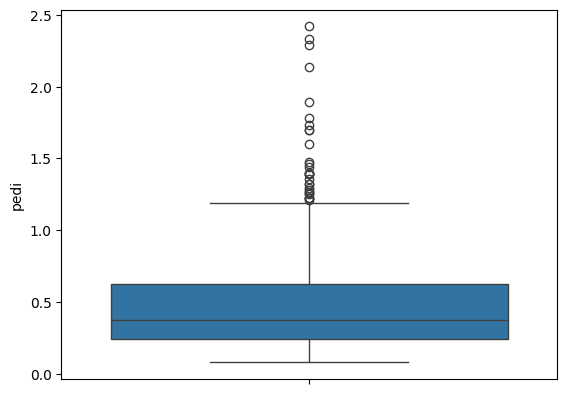

In [6]:
# Gráfico da Variável
sns.boxplot(dados.pedi)

<Axes: ylabel='preg'>

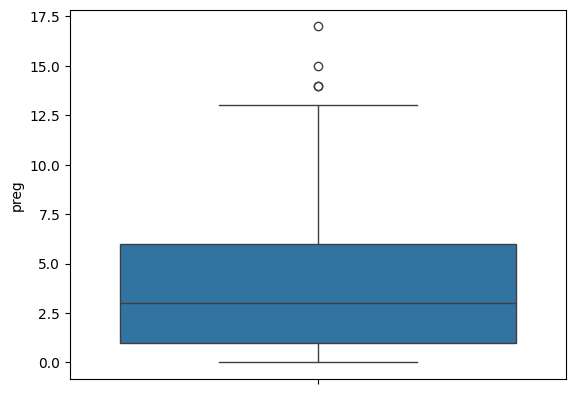

In [7]:
sns.boxplot(dados.preg)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

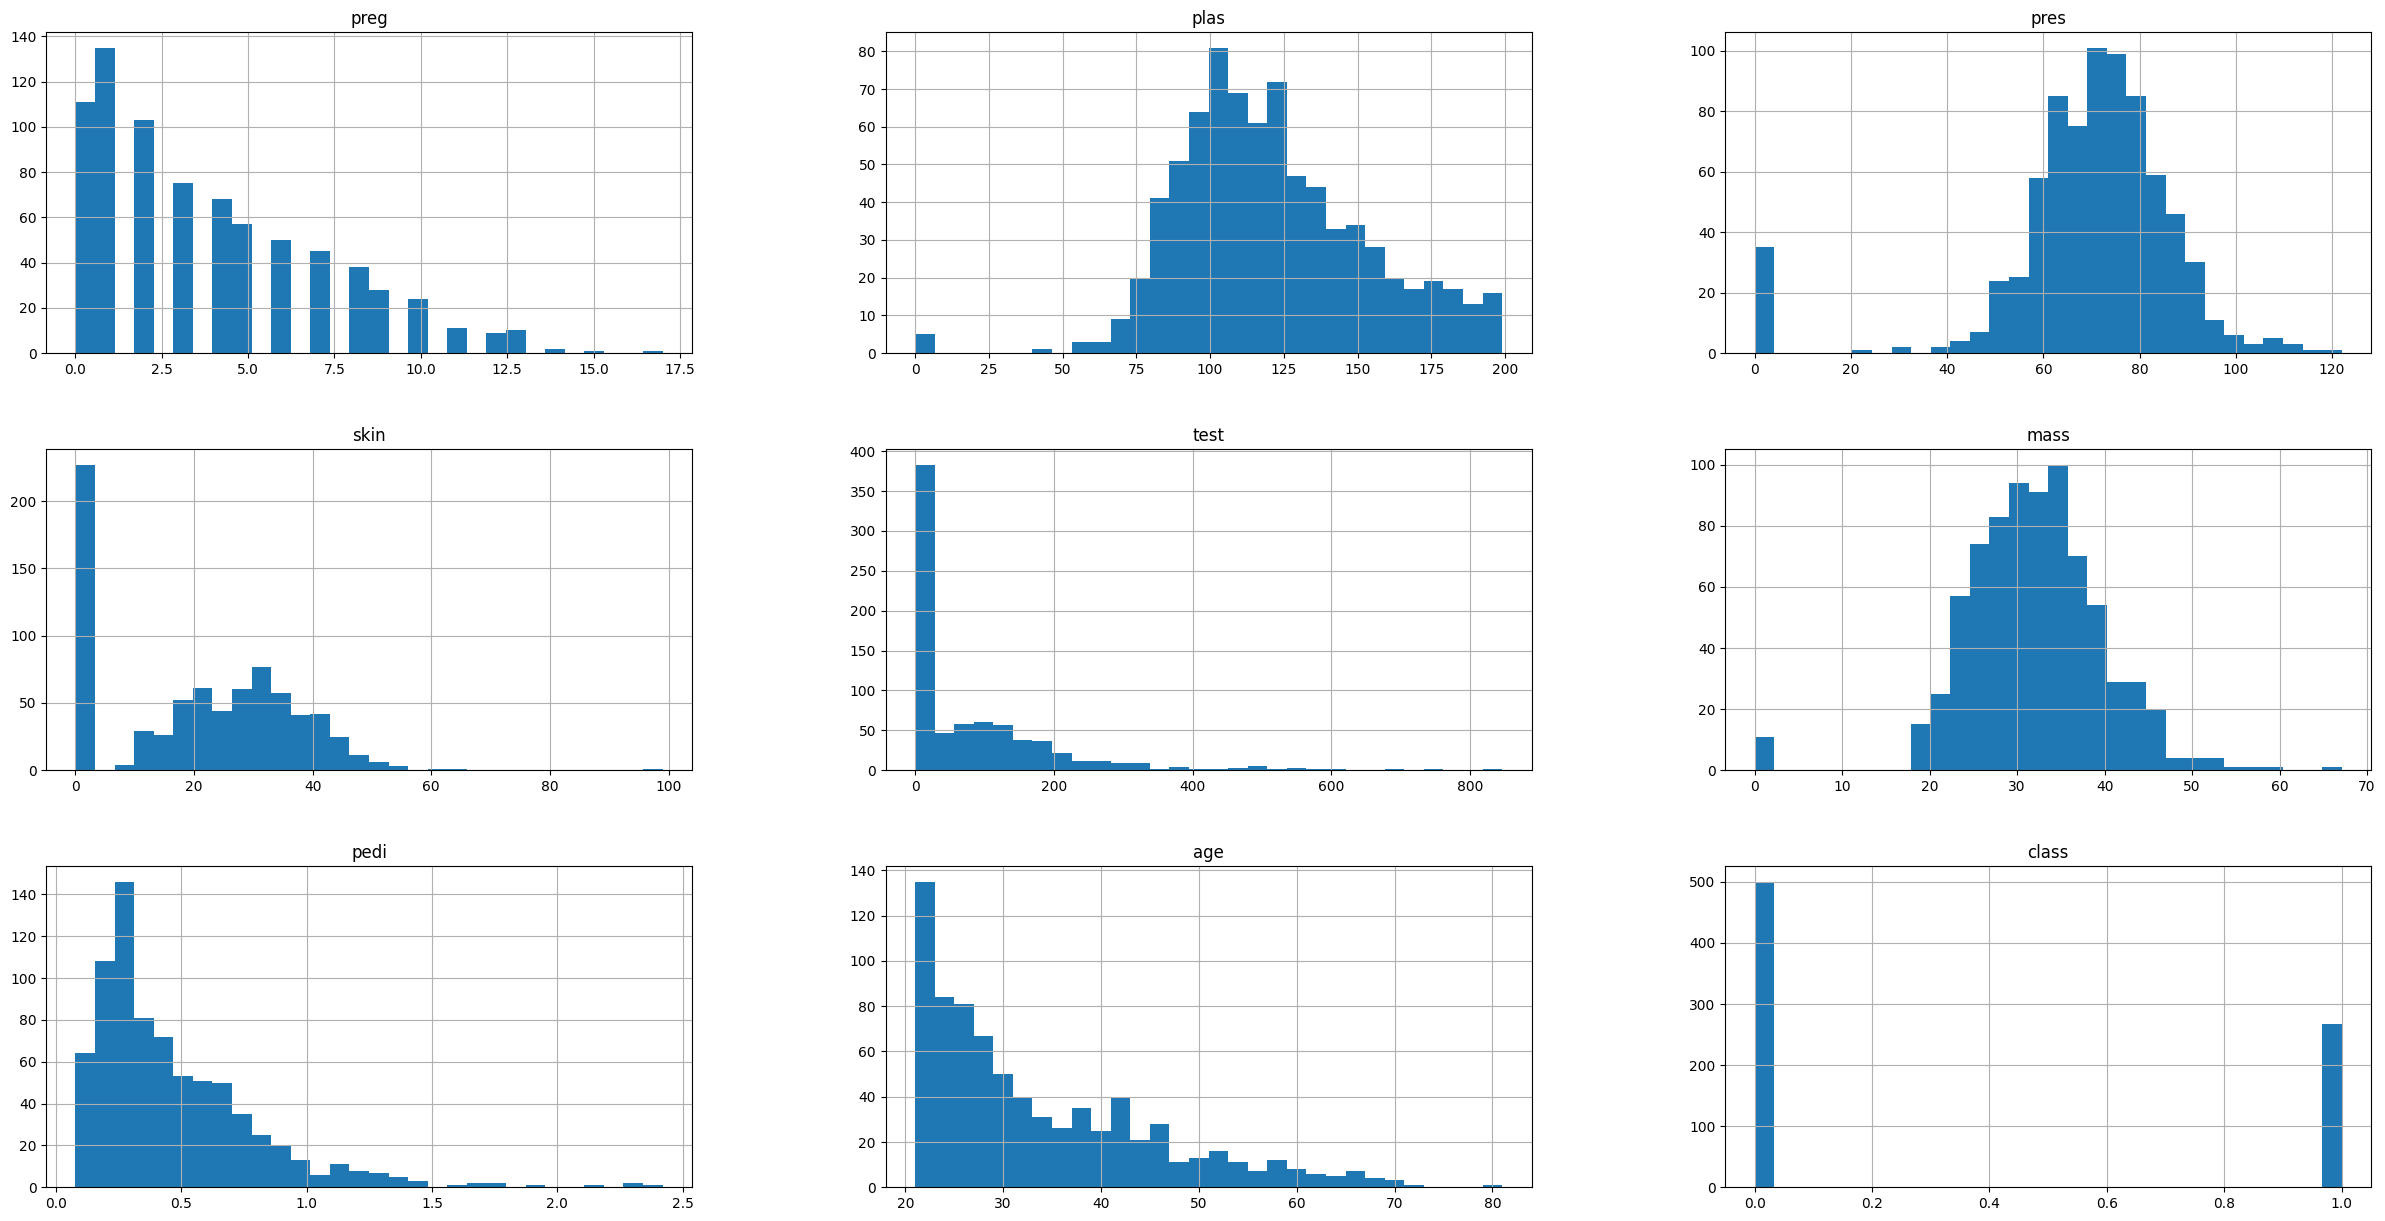

In [8]:
dados.hist(bins=30, figsize=(30, 15))

In [9]:
# Matriz de correlação para avaliar o tanto que uma variável é correlacionada com outra. Acima e 0.1 tem correlação, abaixo representa
# uma
dados.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Valor Absoluto do Coeficiente:
*   0,0 a 0,1: Correlação desprezível.
*   0,1 a 0,3: Correlação fraca.
*   0,3 a 0,5: Correlação moderada.
*   0,5 a 0,7: Correlação forte.
*   0,7 a 0,9: Correlação muito forte.
*   0,9 a 1,0: Correlação quase perfeita.

Sinal do Coeficiente:
* Positivo (+): Indica que, à medida que uma variável aumenta, a outra tende a aumentar.
* Negativo (–): Indica que, à medida que uma variável aumenta, a outra tende a diminuir.

- A variavel preg tem correlação forte com a variavel age.
- A variável plas tem correlação forte com a avariavel class.
- A variável pres não tem muita correlação com as outras.
- A variavel skin tem corelação moderada com a variavel test e mass.
- A variável test tem correlação moderada/fraca com plas.
- A variável mass e pedi não em muita correlação com as outras.

### **3. Pré processamento dos dados**

In [11]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

**Normalização dos dados**
A normalização redimensiona os dados para que estejam em um intervalo específico, geralmente entre 0 e 1.

In [12]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [13]:
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

**Padronização dos dados**
A padronização transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. Isso é feito subtraindo-se a média de cada valor e dividindo pelo desvio padrão da variável.

In [14]:
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [15]:
standardX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### **4. Criação da Máquina Preditiva**

Modelo de validação da máquina preditiva

In [16]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [17]:
# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo,X, Y, cv = kfold)

### **5. Avaliação da Máquina Preditiva**

In [18]:
# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

# Acurácia: 77.864 sem fazer a normalização ou padronização dos dados
# Acurácia: 77.479 normalizando os dados
# Acurácia: 77.346 padronizado

Acurácia: 77.864


Nesse caso, o melhor resultado foi a utilização dos dados sem normalização ou padronização.

# **6. Comparação com XGBoost**

In [19]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [20]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = '/content/diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values


### 6.1 Pré-Processamento

In [21]:
# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.3
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)


In [22]:
### 6.1 Criação da Máquina Preditiva

In [23]:
# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
# Pront do modelo
print(modelo)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [25]:
# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

### 6.2 Avaliação da Máquina Preditiva

In [26]:
# Avaliando as previsões
accuracy = accuracy_score(Y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))
# Acurácia: 73.59% (Menor que a regressão logística)

Acurácia: 73.59%


**A REGRESSÃO LOGÍSTICA COM OS DADOS, SEM a NECESSIDADE DE TRATAMENTO DE NORMALIZAÇÃO E PADRONIZAÇÃO, DEMOSTROU MELHOR DESEMPENHO.**